# Paper Re-implementation
Trying to match the authors as much as possible

## Data

In [1]:
from src.image_generator import generate_images
import matplotlib.pyplot as plt

pygame 2.0.0.dev6 (SDL 2.0.10, python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
data_generator = generate_images(object_types=[
        'ellipse',
        'checkerboard',
        'cube',
        'quad',
        #'star', # buggy
        'line',
        'triangle',
        #'none'
    ], 
    batch_size=32, 
    object_count=20, 
    display_mode=1,
    shape = (160,120),
    single_channel=True)

In [3]:
x,y = next(data_generator)

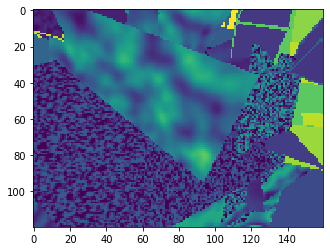

In [4]:
plt.imshow(x[0].reshape(120,160))

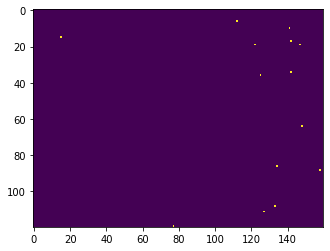

In [5]:
plt.imshow(y[0].reshape(120,160))

In [6]:
x[0].shape

(160, 120, 1)

In [7]:
x.mean()

-2.0605739337042904e-15

## Model

In [8]:
import keras
from keras.layers import Activation, Conv2D, Lambda, BatchNormalization, ZeroPadding2D, MaxPooling2D
from keras.activations import softmax
import tensorflow as tf

Using TensorFlow backend.


In [9]:
f = [64,128,256]
model = keras.models.Sequential()

model.add(ZeroPadding2D((1,1),input_shape=(160,120,1))) #swap with padding=same
model.add(Conv2D(f[0],3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(f[0],3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(f[1],3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(f[1],3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(f[2],3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(f[2],3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(65,1, activation='softmax'))
model.add(Lambda(lambda x: x[:,:,:,:-1]))
model.add(Lambda(lambda x: tf.nn.depth_to_space(x, block_size=8)))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 162, 122, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 120, 64)      640       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 162, 122, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 160, 120, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 60, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 80, 60, 64)        256       
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 82, 62, 64)       

In [11]:
model.compile(loss='binary_crossentropy', #'MSE'
              optimizer='adam',
              metrics=[keras.metrics.MeanIoU(num_classes=2),
                       'accuracy', 'MSE'])

In [12]:
model.fit(data_generator, steps_per_epoch=16, epochs=16)

Epoch 1/16
16/16 [==============================] - 180s 11s/step - loss: 0.0182 - mean_io_u: 0.4991 - accuracy: 0.9983 - MSE: 0.0019
Epoch 2/16
16/16 [==============================] - 178s 11s/step - loss: 0.0175 - mean_io_u: 0.4991 - accuracy: 0.9980 - MSE: 0.0020
Epoch 3/16
16/16 [==============================] - 177s 11s/step - loss: 0.0158 - mean_io_u: 0.4991 - accuracy: 0.9982 - MSE: 0.0019
Epoch 4/16
16/16 [==============================] - 179s 11s/step - loss: 0.0155 - mean_io_u: 0.4991 - accuracy: 0.9982 - MSE: 0.0018
Epoch 5/16
16/16 [==============================] - 177s 11s/step - loss: 0.0156 - mean_io_u: 0.4991 - accuracy: 0.9981 - MSE: 0.0019
Epoch 6/16
16/16 [==============================] - 177s 11s/step - loss: 0.0152 - mean_io_u: 0.4991 - accuracy: 0.9981 - MSE: 0.0019
Epoch 7/16
16/16 [==============================] - 177s 11s/step - loss: 0.0134 - mean_io_u: 0.4991 - accuracy: 0.9984 - MSE: 0.0016
Epoch 8/16
16/16 [==============================] - 175s 11s/s

In [14]:
x_test,y_test = next(data_generator)

In [15]:
y_test_hat = model.predict(x_test)

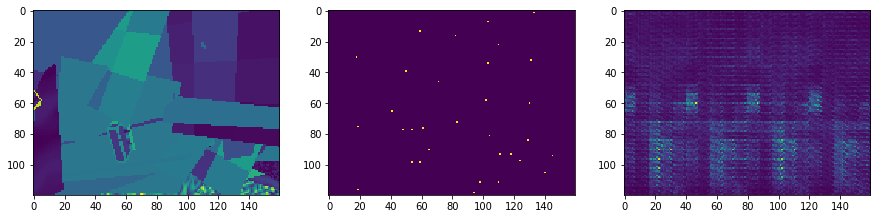

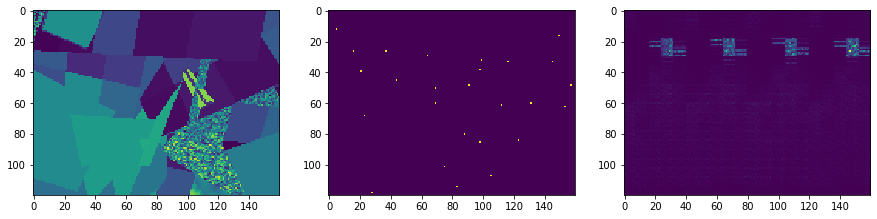

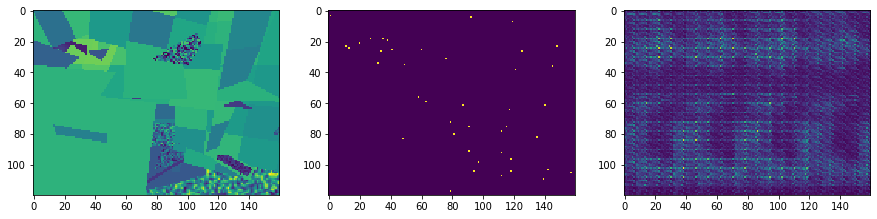

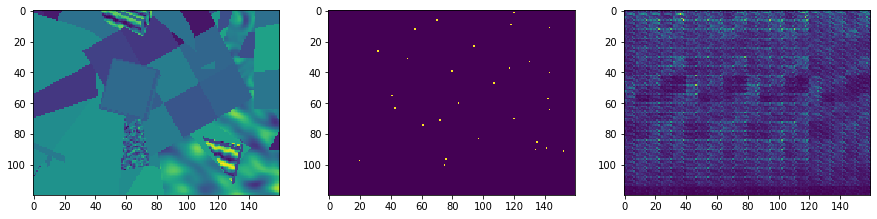

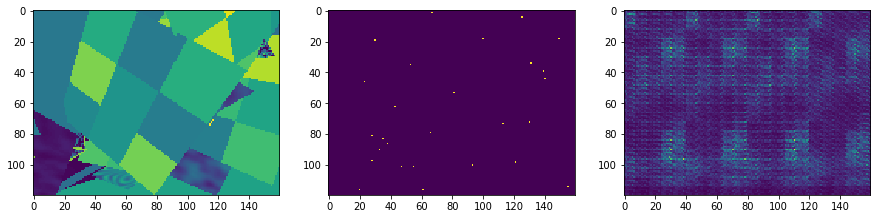

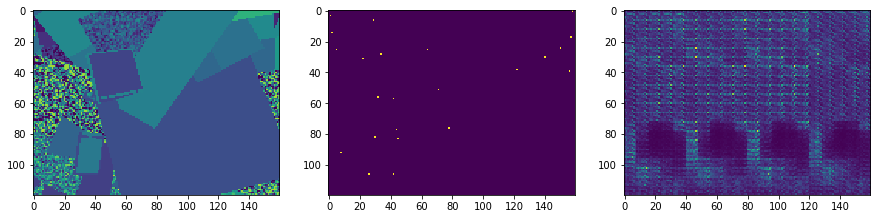

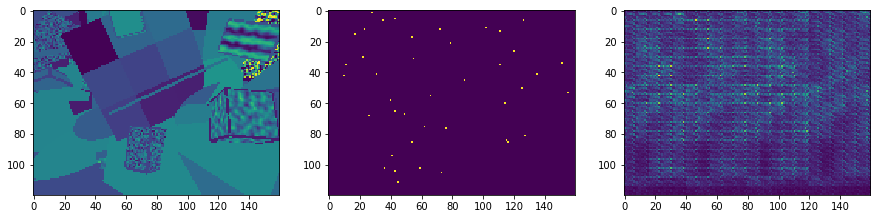

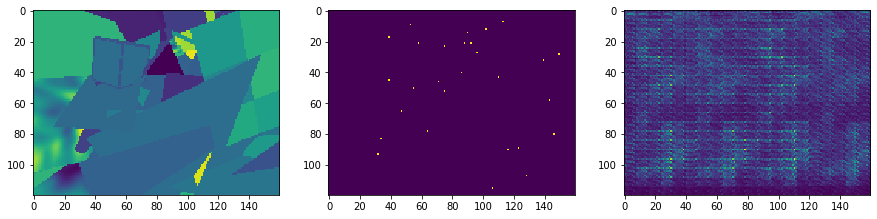

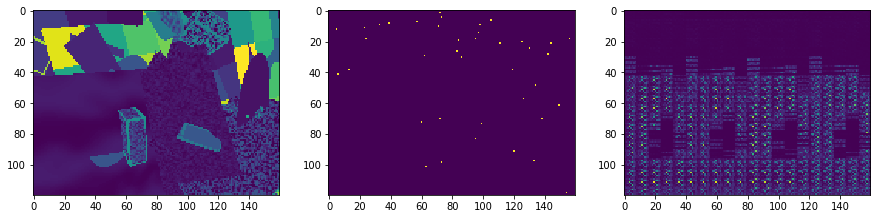

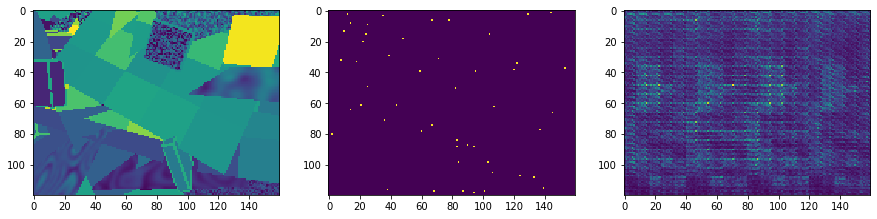

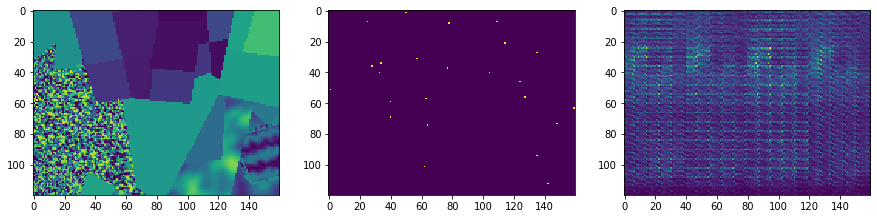

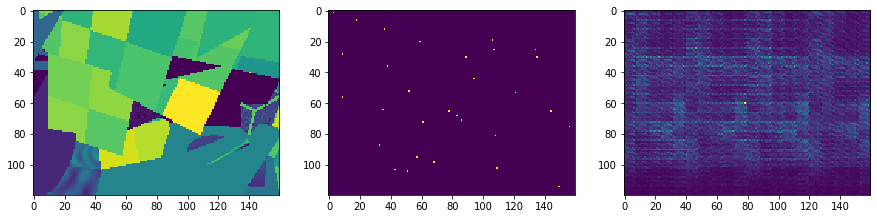

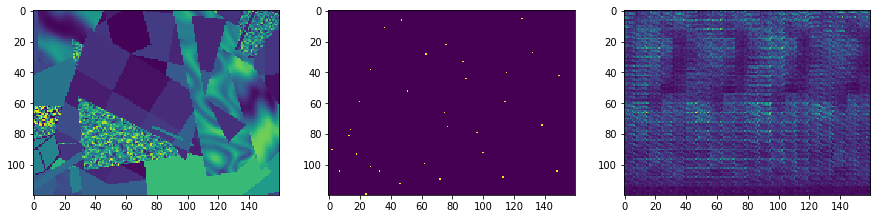

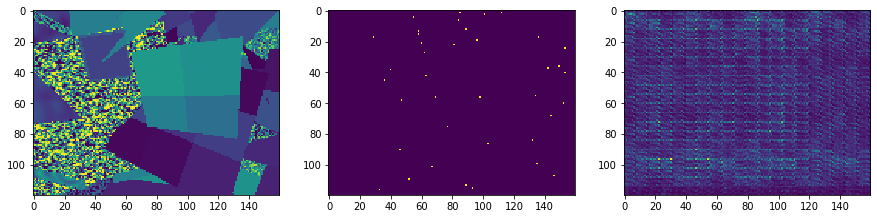

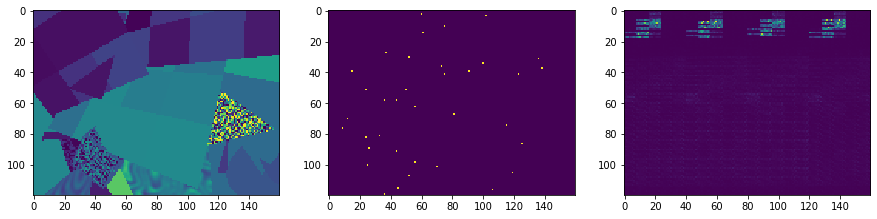

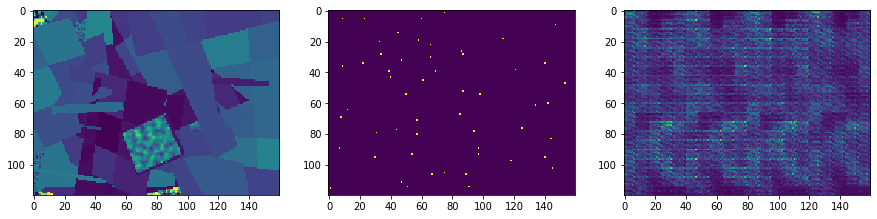

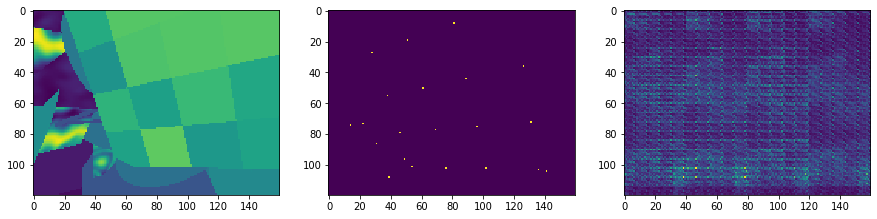

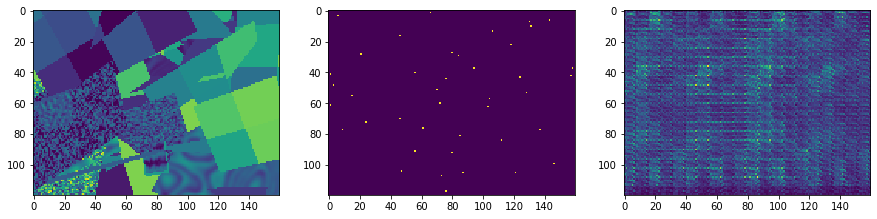

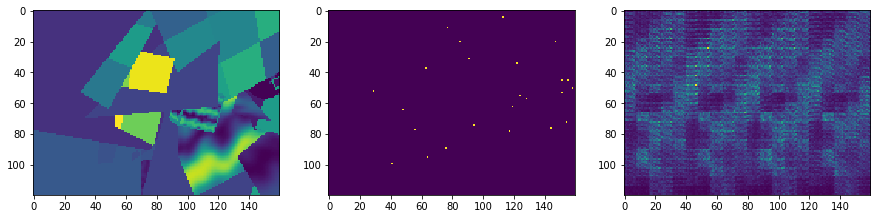

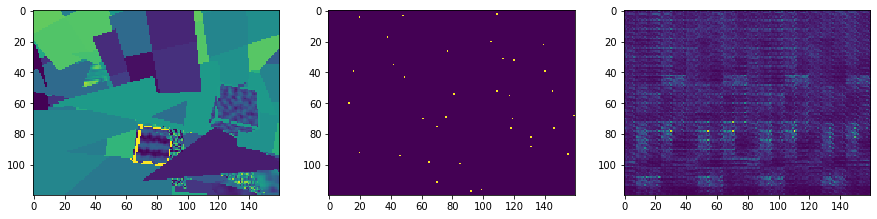

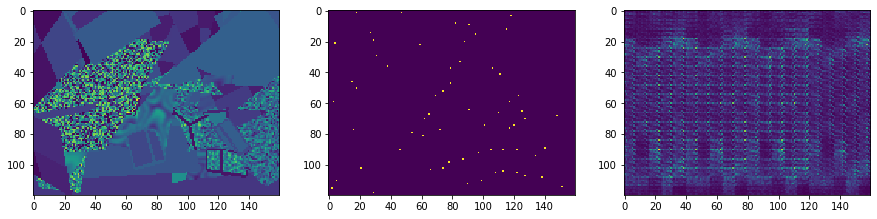

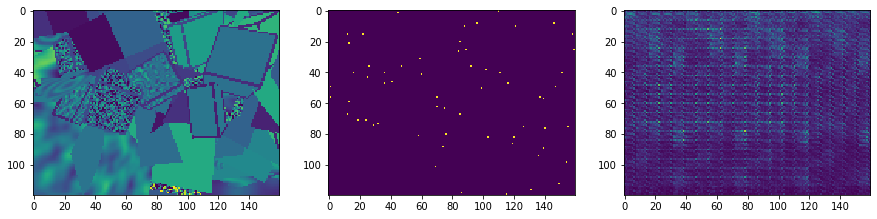

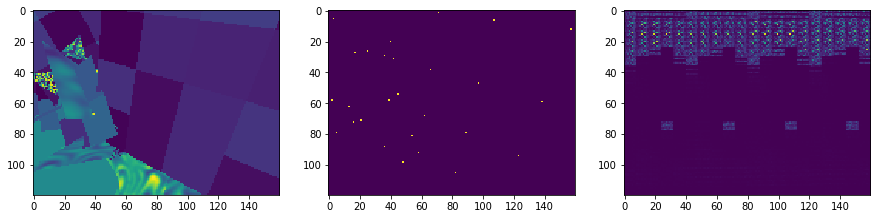

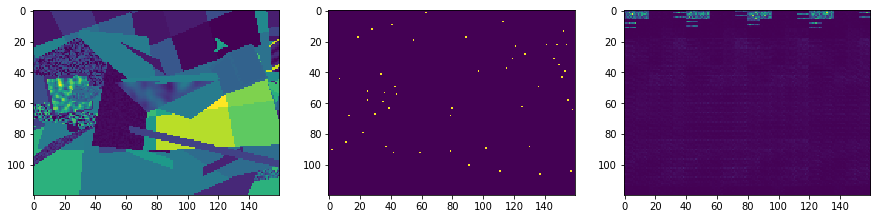

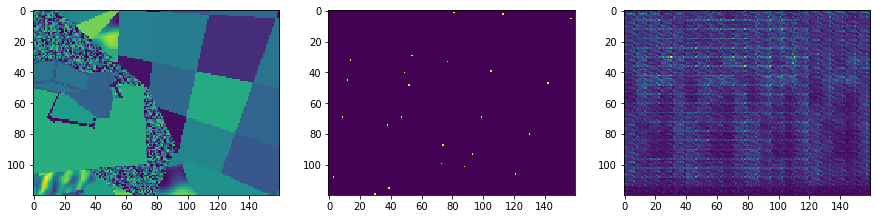

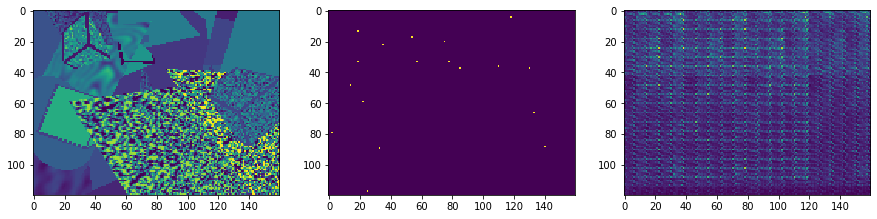

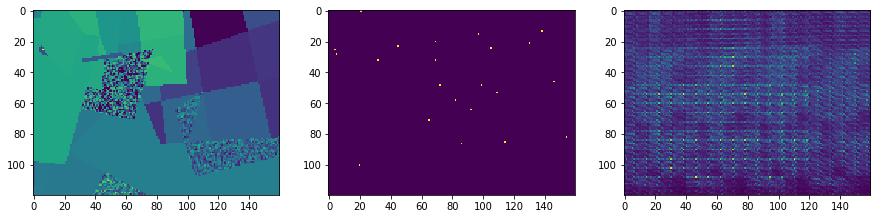

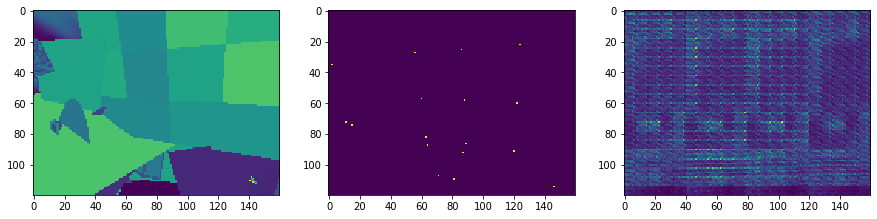

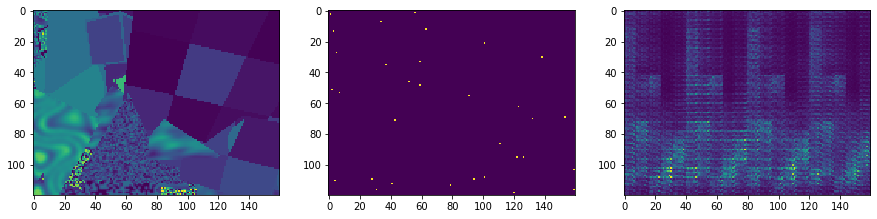

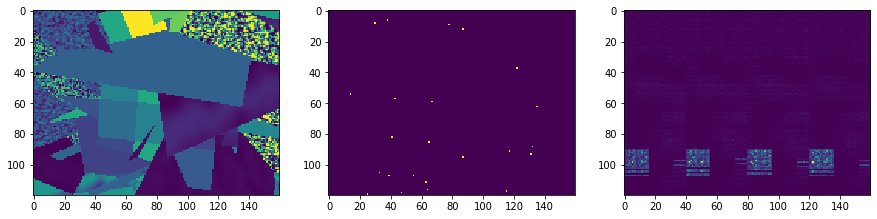

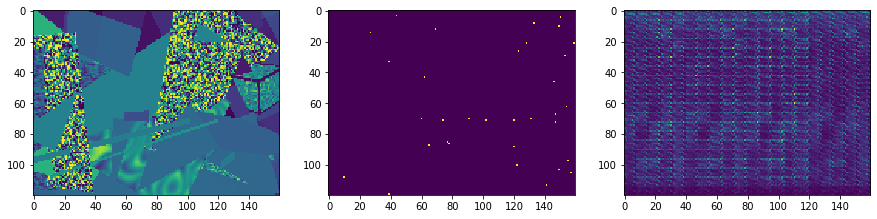

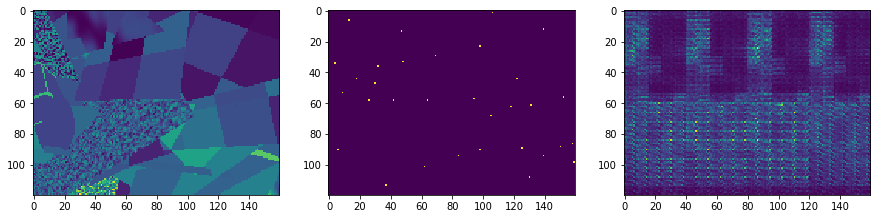

In [16]:
for x,y,y_hat in zip(x_test,y_test,y_test_hat):

    f, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,10))
    ax[0].imshow(x.reshape(120,160))
    ax[1].imshow(y.reshape(120,160))
    ax[2].imshow(y_hat.reshape(120,160))
    plt.show();